In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
# jupyter notebook warning 무시하기

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

from glob import glob
import re

# x, y좌표를 위경도로 변환
from pyproj import Proj, transform

In [110]:

#import xlrd
# euc-kr
# cp949
df = pd.read_excel('../data/07_24_04_P.xlsx')

In [111]:
# 서울시 음식점데이터 30만개
df.shape


(300000, 47)

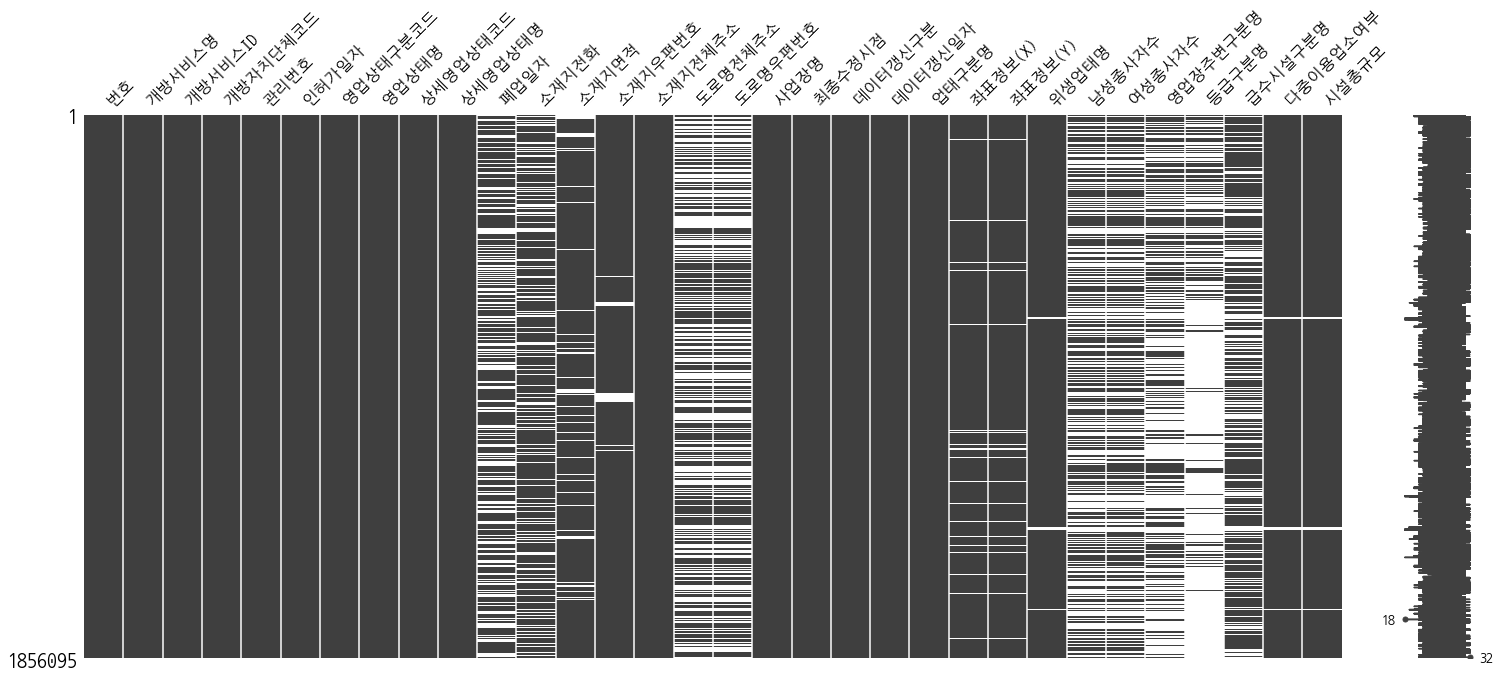

In [7]:
import missingno as msno
msno.matrix(df)


In [4]:
list = ['인허가취소일자','휴업시작일자','휴업종료일자','재개업일자','총종업원수','본사종업원수','공장사무직종업원수','공장판매직종업원수','공장생산직종업원수','건물소유구분명','보증액','월세액','전통업소지정번호','홈페이지','전통업소주된음식']
df.drop(list, axis='columns', inplace=True)

#### null값이 심한 컬럼은 전부 제거
#### 폐업, 영업, 전체 순으로 파일을 분리함

In [66]:
df_1 = df[df['폐업일자'].notnull()]
df_1.to_csv('폐업.csv',sep=',',encoding = 'utf-8')
df_1.to_csv('폐업_R.csv',sep=',',encoding = 'ANSI')

In [67]:

df_2 = df[df['폐업일자'].isnull()]
df_2.to_csv('정상영업.csv',sep=',',encoding = 'utf-8')
df_2.to_csv('정상영업.csv',sep=',',encoding = 'ANSI')

In [ ]:
df.to_csv('서울시음식점.csv',sep=',',encoding = 'utf-8')
df.to_csv('서울시음식점_R.csv',sep=',',encoding = 'ANSI')

In [87]:
df = pd.read_csv('서울시음식점.csv',engine='python',encoding ='utf-8')
df.shape

(300000, 33)

In [88]:
df[df['폐업일자'].notnull()]['폐업일자'].shape

(215094,)

In [98]:
# 서울시에서 나온 음식점 71퍼가 망함
df[df['폐업일자'].notnull()]['폐업일자'].shape[0]/df['폐업일자'].shape[0]

0.71698

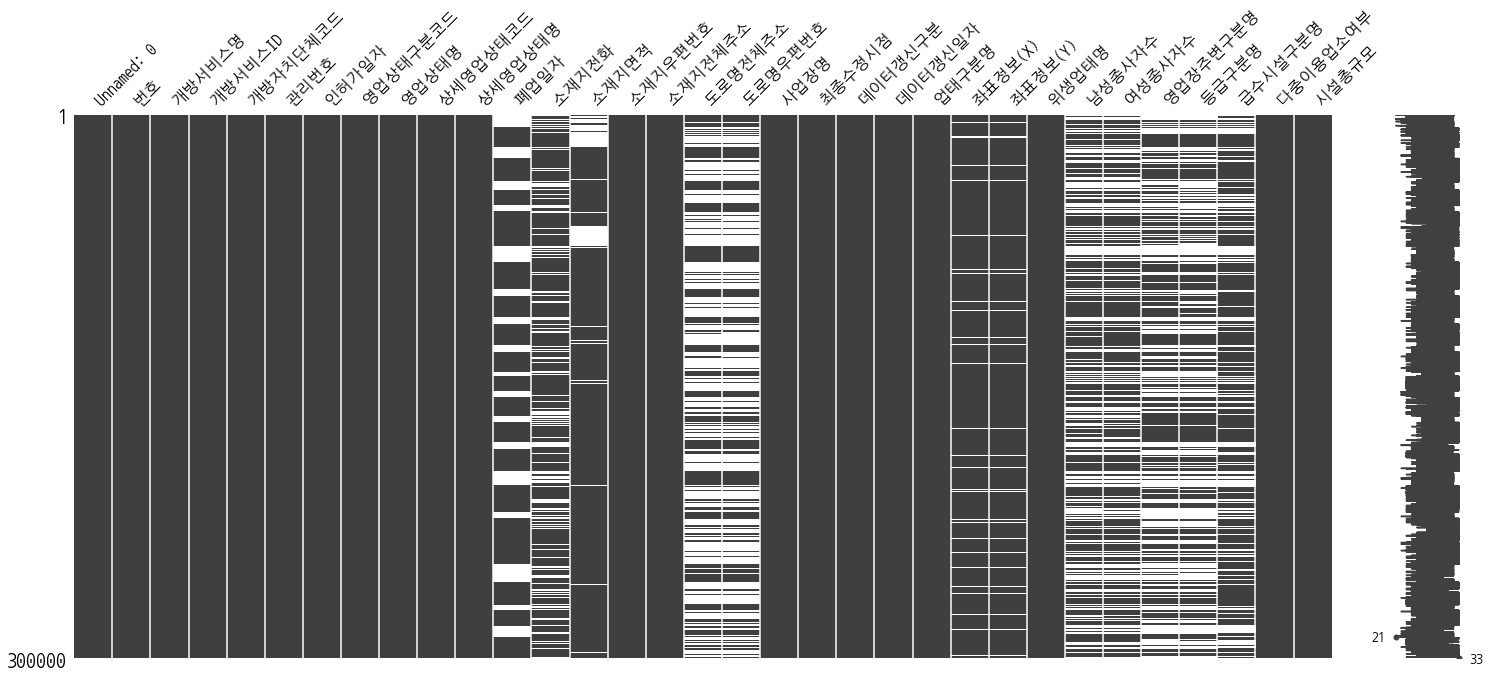

In [114]:
msno.matrix(df)

In [109]:
print(df[(df['폐업일자']>=20190101)&(df['폐업일자']<20200101)]['폐업일자'].shape)
print(df[(df['폐업일자']>=20200101)]['폐업일자'].shape)
print(df[(df['폐업일자']>=20190101)&(df['폐업일자']<20190401)]['폐업일자'].shape)

(8554,)
(1748,)
(2386,)


In [ ]:
# 데이터에서는 위경도가 아닌 도로명주소지도에서 사용하는 utm-k를 사용
# 이를 다시 위경도(wgs84)로 변경해주기 위해서 `pyproj`를 사용

# utm-k의 epsg = 5174, wgs84의 epsq = 4326
proj_UTMK = Proj(init='epsg:5174') ## 도로명주소지도에서 사용 x,y좌표
proj_WGS84 = Proj(init='epsg:4326') ## 경도/위도, gps사용 

In [90]:
# 돌아가는지 확인
x1, y1 = df['좌표정보(X)'][0],df['좌표정보(X)'][0]
lon, lat = transform(proj_UTMK,proj_WGS84,x1,y1) 

lon = []
lat = []

In [ ]:
#for문을 이용해서 변환 후 list화 ... 오래걸림
for i in range(300000):
    x1, y1 = df['좌표정보(X)'][i],df['좌표정보(X)'][i]
    x2, y2 = transform(proj_UTMK,proj_WGS84,x1,y1) 
    lon.append(x2)
    lat.append(y2)


In [7]:
# 만든 lon, lat을 새로운 컬럼으로 추가
df['lon'] = lon
df['lat'] = lat

In [ ]:
df[['lon','lat']]

In [6]:
lon = []
lat = []

# 이런식으로 append를 미리 선언해두는 것이 더 빠르다 30%쯤?
append_a = lon.append
append_b = lat.append
for i in range(300000):
    
    x1, y1 = df['좌표정보(X)'][i],df['좌표정보(X)'][i]
    x2, y2 = transform(proj_UTMK,proj_WGS84,x1,y1) 
    append_a(x2)
    append_b(y2)
    
# 아예 list안에 for문을 돌리면 가장 빠르겠지만
# 변수가 2개여서 포기
#  더오래걸리는거 같다 한 3시간 20분 정도 걸림

In [8]:
# 코로나 이동경로 14일 지나면 삭제됨
# 대신 각지역의 평균위경도, 구별 확진자를 통해서 비교해볼만함




,Unnamed: 0,번호,개방서비스명,개방서비스ID,개방자치단체코드,관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,...,위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,다중이용업소여부,시설총규모,lon,lat
0,0,1,일반음식점,07_24_04_P,3000000,3000000-101-1986-10484,19860827,1,영업/정상,1,...,한식,NaN,NaN,NaN,NaN,NaN,N,0.00,119.758608,21.549561
1,1,2,일반음식점,07_24_04_P,3000000,3000000-101-2002-12123,20020730,1,영업/정상,1,...,한식,0.0,0.0,NaN,NaN,NaN,N,112.20,119.773947,21.565417
2,2,3,일반음식점,07_24_04_P,3000000,3000000-101-1990-05749,19900824,1,영업/정상,1,...,일식,0.0,0.0,기타,기타,상수도전용,N,32.10,119.802014,21.594420
3,3,4,일반음식점,07_24_04_P,3000000,3000000-101-1999-03068,19860312,1,영업/정상,1,...,정종/대포집/소주방,3.0,2.0,기타,갑,상수도전용,N,178.05,119.775112,21.566621
4,4,5,일반음식점,07_24_04_P,3000000,3000000-101-2002-12018,20020507,1,영업/정상,1,...,한식,0.0,0.0,NaN,NaN,상수도전용,N,67.84,119.798068,21.590343


In [11]:
# 위경도 추가한 데이터 베이스 저장
df.to_csv('../data/shop/서울시음식점_1.csv',sep=',',encoding = 'utf-8')
df.to_csv('../data/shop/서울시음식점_1_R.csv',sep=',',encoding = 'ANSI')

In [ ]:
df_1 = df[df['폐업일자'].notnull()]
df_1.to_csv('../data/shop/폐업.csv',sep=',',encoding = 'utf-8')
df_1.to_csv('../data/shop/폐업_R.csv',sep=',',encoding = 'ANSI')

In [14]:
df_2 = df[df['폐업일자'].isnull()]
df_2.to_csv('../data/shop/정상영업.csv',sep=',',encoding = 'utf-8')
df_2.to_csv('../data/shop/정상영업_R.csv',sep=',',encoding = 'ANSI')

### 다같이 정해서 시작

In [ ]:
df = pd.read_excel('../data/07_24_04_P.xlsx',sheet_name = 1)

In [29]:
list = ['번호', '상세영업상태명', '인허가일자', '폐업일자', '시설총규모'
 ,'소재지전체주소', '사업장명' , '업태구분명', '좌표정보(X)','좌표정보(Y)',
'영업장주변구분명']
list

['번호',
 '상세영업상태명',
 '인허가일자',
 '폐업일자',
 '시설총규모',
 '소재지전체주소',
 '사업장명',
 '업태구분명',
 '좌표정보(X)',
 '좌표정보(Y)',
 '영업장주변구분명']

In [31]:
df = df[list]
df.to_csv('../../data/shop/all_shop.csv',sep=',',encoding = 'utf-8',index=False)
df.to_csv('../../data/shop/all_shop_R.csv',sep=',',encoding = 'ANSI',index=False)

In [ ]:
df = pd.read_csv('../data/shop/shop_2.csv',engine='python', encoding = 'utf-8')
df = df[df['폐업일자']>=20100101]

In [32]:
df1 = df['폐업일자']
df['폐업년월'] = round(df1/100)

In [36]:
df['폐업년월'] = df['폐업년월'].astype(str)
df['폐업년월']

0               nan
1               nan
2               nan
3               nan
4               nan
             ...   
1856090    200403.0
1856091    202001.0
1856092    200110.0
1856093    200503.0
1856094    201611.0
Name: 폐업년월, Length: 1856095, dtype: object

In [39]:

b = ['01.0','02.0','03.0']
data = df[df['폐업년월'] == '']

for i in range(2000,2021): 
    for j in b:
        a = str(i)+j
        data = pd.concat([data , df[df['폐업년월'] == a]])

In [ ]:
data1 = data.drop('Unnamed: 0', axis = 1)

In [42]:
data1.to_csv('../data/shop/shop_2.csv',sep=',',encoding = 'utf-8',index =False)
data1.to_csv('../data/shop/shop_2_R.csv',sep=',',encoding = 'ANSI',index =False)

In [65]:
df = pd.read_csv('../data/shop/폐업.csv',sep=',',encoding = 'utf-8')
df

,번호,개방서비스명,개방서비스ID,개방자치단체코드,관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,...,위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,다중이용업소여부,시설총규모,lon,lat
0,7101,일반음식점,07_24_04_P,3000000,3000000-101-1983-08022,19831203,3,폐업,2,폐업,...,정종/대포집/소주방,1.0,1.0,기타,갑,상수도전용,N,24.00,inf,inf
1,7102,일반음식점,07_24_04_P,3000000,3000000-101-1983-01066,19831204,3,폐업,2,폐업,...,한식,1.0,1.0,기타,갑,상수도전용,N,55.79,119.804327,21.596809
2,7103,일반음식점,07_24_04_P,3000000,3000000-101-1991-00513,19910509,3,폐업,2,폐업,...,한식,0.0,2.0,기타,기타,상수도전용,N,32.74,119.751740,21.542461
3,7104,일반음식점,07_24_04_P,3000000,3000000-101-1995-05109,19950811,3,폐업,2,폐업,...,경양식,0.0,0.0,기타,기타,상수도전용,N,47.39,119.788297,21.580247
4,7105,일반음식점,07_24_04_P,3000000,3000000-101-1995-07263,19950811,3,폐업,2,폐업,...,분식,0.0,0.0,기타,기타,상수도전용,N,26.61,119.788486,21.580442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215089,299996,일반음식점,07_24_04_P,3180000,3180000-101-1988-04589,19881115,3,폐업,2,폐업,...,분식,0.0,2.0,기타,지도,상수도전용,N,30.24,119.730208,21.520195
215090,299997,일반음식점,07_24_04_P,3180000,3180000-101-1989-06949,19891218,3,폐업,2,폐업,...,경양식,3.0,2.0,기타,지도,상수도전용,N,130.33,119.706258,21.495419
215091,299998,일반음식점,07_24_04_P,3180000,3180000-101-2000-13834,20001116,3,폐업,2,폐업,...,한식,0.0,0.0,기타,기타,상수도전용,N,145.14,119.737764,21.528008
215092,299999,일반음식점,07_24_04_P,3180000,3180000-101-1990-11090,19900226,3,폐업,2,폐업,...,한식,1.0,2.0,기타,지도,상수도전용,N,48.51,119.713389,21.502796


In [ ]:
list = ['번호', '상세영업상태명', '인허가일자', '폐업일자', '시설총규모'
 ,'소재지전체주소', '사업장명' , '업태구분명', '좌표정보(X)','좌표정보(Y)',
'영업장주변구분명']

In [ ]:
df = df[list]
df

In [69]:
df1 = df['폐업일자']
df['폐업년월'] = round(df1/100)

df['폐업년월'] = df['폐업년월'].astype(str)
df['폐업년월']

b = ['01.0','02.0','03.0']
data = df[df['폐업년월'] == '']

for i in range(2000,2021): 
    for j in b:
        a = str(i)+j
        data = pd.concat([data , df[df['폐업년월'] == a]])
        

In [ ]:
data.to_csv('../data/shop/shop.csv',sep=',',encoding = 'utf-8',index =False)
data.to_csv('../data/shop/shop_R.csv',sep=',',encoding = 'ANSI',index =False)

In [108]:
data = pd.read_csv('../data/shop/shop_2.csv',sep=',',encoding = 'utf-8')
data

,번호,상세영업상태명,인허가일자,폐업일자,시설총규모,소재지전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),영업장주변구분명,폐업년월
0,301864,폐업,20090929.0,20100126.0,33.00,서울특별시 영등포구 영등포동5가 123-5번지 (지상1층),보리추어탕,한식,191606.654674,446572.705939,NaN,201001.0
1,302157,폐업,20091113.0,20100119.0,29.16,서울특별시 영등포구 여의도동 25-4번지 지하1층 102호,비비큐참숯바베큐,통닭(치킨),193420.281014,446832.923009,NaN,201001.0
2,302618,폐업,20010604.0,20100105.0,44.24,서울특별시 영등포구 여의도동 13-19번지,너섬공간,한식,192956.125430,447539.749512,주택가주변,201001.0
3,302755,폐업,20000117.0,20100128.0,51.15,서울특별시 영등포구 양평동4가 83-2번지,해물칼국수,분식,190598.149038,448235.107891,기타,201001.0
4,302968,폐업,20010921.0,20100114.0,29.70,서울특별시 영등포구 대림동 1116-1번지,대신참치,일식,190753.245560,443348.287575,기타,201001.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21256,592256,폐업,20081202.0,20200313.0,63.21,대구광역시 북구 읍내동 1297-15번지,삼미식당,한식,339630.593512,272769.429193,주택가주변,202003.0
21257,592921,폐업,20090917.0,20200304.0,28.90,대구광역시 북구 서변동 1751-15번지,보케르,한식,344020.268402,270098.580417,기타,202003.0
21258,594151,폐업,20190827.0,20200320.0,27.28,대구광역시 북구 대현동 24-16번지,하비유스도시락&카페,기타,345618.292112,266113.273152,NaN,202003.0
21259,594157,폐업,20190424.0,20200325.0,33.81,대구광역시 북구 산격동 824-3번지,내이름은김떡순,분식,344020.638405,267547.949489,주택가주변,202003.0


In [111]:
proj_UTMK = Proj(init='epsg:5178') ## 도로명주소지도에서 사용 x,y좌표
proj_WGS84 = Proj(init='epsg:4326') ## 경도/위도, gps사용 

# 돌아가는지 확인
x1, y1 = df['좌표정보(X)'][0],df['좌표정보(X)'][0]
lon, lat = transform(proj_UTMK,proj_WGS84,x1,y1) 

lon = []
lat = []

In [112]:
#for문을 이용해서 변환 후 list화 ... 오래걸림
for i in range(21261):
    x1, y1 = data['좌표정보(X)'][i],data['좌표정보(X)'][i]
    x2, y2 = transform(proj_UTMK,proj_WGS84,x1,y1) 
    lon.append(x2)
    lat.append(y2)
data['lon'] = lon
data['lat'] = lat

In [113]:
data.to_csv('../data/shop/shop_2.csv',sep=',',encoding = 'utf-8',index =False)
data.to_csv('../data/shop/shop_2_R.csv',sep=',',encoding = 'ANSI',index =False)

### 정리

In [2]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
# jupyter notebook warning 무시하기

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

from glob import glob
import re

# x, y좌표를 위경도로 변환
from pyproj import Proj, transform

In [119]:
df = pd.read_excel('../data/07_24_04_P.xlsx',sheet_name = '일반음식점_7')
import missingno as msno
msno.matrix(df)


In [122]:
list = ['번호', '상세영업상태명', '인허가일자', '폐업일자', '시설총규모'
 ,'소재지전체주소', '사업장명' , '업태구분명', '좌표정보(X)','좌표정보(Y)',
'영업장주변구분명']

df = df[list]
df.to_csv('../data/shop/shop_8.csv',sep=',',encoding = 'utf-8',index =False)
df.to_csv('../data/shop/shop_8_R.csv',sep=',',encoding = 'ANSI',index =False)

In [123]:
df = pd.read_csv('../data/shop/shop_8.csv',engine='python', encoding = 'utf-8')
df = df[df['폐업일자']>=20100101]

df['폐업년월'] = round(df1/100)

df['폐업년월'] = df['폐업년월'].astype(str)

b = ['01.0','02.0','03.0']
data = df[df['폐업년월'] == '']


In [124]:
for i in range(2000,2021): 
    for j in b:
        a = str(i)+j
        data = pd.concat([data , df[df['폐업년월'] == a]])

In [125]:
data.to_csv('../data/shop/shop_8.csv',sep=',',encoding = 'utf-8',index =False)
data.to_csv('../data/shop/shop_8_R.csv',sep=',',encoding = 'ANSI',index =False)

In [178]:
df = pd.read_csv('../data/shop/concat_shop.csv',engine='python', encoding = 'utf-8')

In [ ]:
# 데이터에서는 위경도가 아닌 도로명주소지도에서 사용하는 utm-k를 사용
# 이를 다시 위경도(wgs84)로 변경해주기 위해서 `pyproj`를 사용

# utm-k의 epsg = 5174, wgs84의 epsq = 4326
proj_UTMK = Proj(init='epsg:5174') ## 도로명주소지도에서 사용 x,y좌표
proj_WGS84 = Proj(init='epsg:4326') ## 경도/위도, gps사용 

In [ ]:
# 돌아가는지 확인
x1, y1 = df['좌표정보(X)'][0],df['좌표정보(Y)'][0]
x2, y2 = transform(proj_UTMK,proj_WGS84,x1,y1)
x2

In [ ]:
 

lon = []
lat = []

#for문을 이용해서 변환 후 list화 ... 오래걸림
for i in range(66609):
    x1, y1 = df['좌표정보(X)'][i],df['좌표정보(Y)'][i]
    x2, y2 = transform(proj_UTMK,proj_WGS84,x1,y1) 
    lon.append(x2)
    lat.append(y2)
df['lon'] = lon
df['lat'] = lat

In [194]:
df = df.drop('폐업년월', axis = 1)
df

,번호,상세영업상태명,인허가일자,폐업일자,시설총규모,소재지전체주소,사업장명,업태구분명,좌표정보(X),좌표정보(Y),영업장주변구분명,lon,lat
0,7282,폐업,19951209.0,20000121.0,13.82,서울특별시 종로구 명륜2가 704-307번지,불곱창,한식,NaN,NaN,기타,inf,inf
1,7595,폐업,19991120.0,20000107.0,156.72,서울특별시 종로구 인사동 99-0번지,99번가,분식,198697.427424,452050.152655,기타,126.986043,37.570739
2,8241,폐업,19991208.0,20000120.0,51.34,서울특별시 종로구 창신동 271-0번지,이가네 닭한마리,분식,201275.959937,452348.794793,기타,127.015232,37.573430
3,8312,폐업,19990828.0,20000128.0,46.44,서울특별시 종로구 청진동 182-4번지,석란,경양식,198119.023796,452150.721724,기타,126.979496,37.571644
4,8978,폐업,19991214.0,20000131.0,79.02,서울특별시 종로구 관철동 14-6번지,깨비종합분식,분식,198724.740257,451930.754248,유흥업소밀집지역,126.986353,37.569663
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66604,1853888,폐업,20181116.0,20181224.0,72.13,제주특별자치도 서귀포시 남원읍 신흥리 1571번지,작은농부,한식,176508.067696,-20130.495876,NaN,126.748547,33.314669
66605,1853889,폐업,20181119.0,20191105.0,123.25,제주특별자치도 서귀포시 성산읍 신산리 1036-4번지 1층,독자봉올레,한식,188458.382549,-12763.507885,NaN,126.876784,33.381286
66606,1854107,폐업,19911105.0,20181123.0,44.74,제주특별자치도 서귀포시 색달동 2101번지,중문CC사모정,한식,144475.137879,-27188.466697,기타,126.404997,33.249860
66607,1854127,폐업,19900817.0,20110106.0,36.50,제주특별자치도 서귀포시 서홍동 668번지,전북전주식당,한식,158902.767813,-27879.205351,기타,126.559844,33.244278


In [195]:
df.to_csv('../data/shop/concat_shop.csv',sep=',',encoding = 'utf-8',index =False)
df.to_csv('../data/shop/concat_shop_R.csv',sep=',',encoding = 'ANSI',index =False)

In [131]:
a1 = pd.read_csv('../data/shop/shop.csv',engine='python', encoding = 'utf-8')
a2 = pd.read_csv('../data/shop/shop_2.csv',engine='python', encoding = 'utf-8')
a3 = pd.read_csv('../data/shop/shop_8.csv',engine='python', encoding = 'utf-8')

In [138]:
result = pd.concat([a1,a2,a3])
result.to_csv('../data/shop/concat_shop.csv',sep=',', encoding='utf-8', index =False)
result.to_csv('../data/shop/concat_shop_R.csv',sep=',',encoding='ANSI', index =False)

In [50]:
df = pd.read_csv('../data/shop/concat_shop.csv',sep=',', encoding='utf-8',engine='python')

In [54]:
for i in range(3,7):
    df1 = pd.read_csv('../data/shop/shop_{}.csv'.format(i),sep=',', encoding='utf-8',engine='python')
    df = pd.concat([df, df1])

In [ ]:
df.to_csv('../data/shop/concat_shop.csv', sep=',',encoding='utf-8',index=False)
df.to_csv('../data/shop/concat_shop_R.csv', sep=',',encoding='ANSI',index=False)

### 전체 데이터

In [ ]:
df_all = pd.read_excel('../data/07_24_04_P.xlsx', sheet_name = None)


In [ ]:
df_all['일반음식점_1']
df_all_s = pd.DataFrame()
for i in range(1,8):
    
    df_all_s = pd.concat([df_all_s,df_all['일반음식점_{}'.format(i)]])

In [ ]:
df_all_s.to_csv('../data/shop/all_shop.csv',sep=',',encoding='utf-8', index =False)
df_all_s.to_csv('../data/shop/all_shop_R.csv',sep=',',encoding='ANSI', index =False)

In [211]:
a = df_all_s[(df_all_s['폐업일자'] > 20190101)&(df_all_s['폐업일자'] < 201901231)].shape[0]
b = df_all_s[df_all_s['폐업일자'] > 20190101].shape[0]


1.0

In [ ]:
# 2019년 폐업한 가계 수
df[df['폐업일자'] > 20190101& df['폐업일자'] < 20191231]

# 2019년 남아있던 가계 수
df[df['폐업일자'] <20190101]

str.contains('서울특별시')

### 서울시 전체 데이터 보기

In [ ]:
df_all = pd.read_csv('../../data/shop/all_shop.csv')

In [19]:
list = ['번호', '상세영업상태명', '인허가일자', '폐업일자', '시설총규모'
 ,'소재지전체주소', '사업장명' , '업태구분명', '좌표정보(X)','좌표정보(Y)',
'영업장주변구분명']
df_all = df_all[list]
df_all_o = df_all[df_all['상세영업상태명'] =='영업']
df_close = df_all[df_all['폐업일자']>=20000101]

In [30]:
df_close = pd.concat([df_close,df_all_o])

In [32]:
df_close.to_csv('../../data/shop/open_shop.csv', index=False, encoding='utf-8', sep=',')

In [ ]:
db = MySQLdb.connect(db="data", host="localhost", user="root", passwd="***")

